pbtest3: This notebook have focus on making a clasification machine learning model

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
from reader import generic_reader
from inflation import read_cpi_by_year, convert_usd

In [2]:
cpi_by_year = read_cpi_by_year("inflation_data/cpiai.csv")

In [3]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies_clean.csv")
df_movies['release_date'] = pd.to_datetime(df_movies['release_date']) # Convert release_date into proper datetime objects
df_movies['genre_ids'] = df_movies['genre_ids'].apply(ast.literal_eval) # Turn genre_ids into actual Python list
df_movies['director_person_ids'] = df_movies['director_person_ids'].apply(ast.literal_eval) # Turn director_person_ids into actual Python list
len(df_movies)

20489

In [4]:
# Drop movies where budget is zero
df_movies = df_movies[df_movies['budget'] != 0].copy()
len(df_movies)

6200

In [5]:
columns_to_keep = ['movie_id', 'original_title', 'release_date', 'budget', 'budget_2023_usd', 'runtime', 'vote_average', 'vote_count', 'director_person_ids', 'genre_ids']
df_movies = df_movies[columns_to_keep].copy()
df_movies

,movie_id,original_title,release_date,budget,budget_2023_usd,runtime,vote_average,vote_count,director_person_ids,genre_ids
6,19214,Passion of Mind,2000-01-07,12000000,21233560,105,5.800,42,[96972],"[18, 10749]"
13,17908,My Dog Skip,2000-01-12,6000000,10616780,95,6.700,280,[46297],"[35, 18, 10751]"
14,10471,Next Friday,2000-01-12,11000000,19464096,98,6.453,609,[52112],[35]
16,10384,Supernova,2000-01-14,90000000,159251699,91,4.940,409,"[1723, 62020]","[878, 27, 53]"
21,10213,From Dusk Till Dawn 3: The Hangman's Daughter,2000-01-18,5000000,8847317,94,4.900,369,[64190],"[37, 27, 53]"
...,...,...,...,...,...,...,...,...,...,...
20481,850165,The Iron Claw,2023-12-21,15900000,15900000,132,7.540,1088,[527607],"[36, 18]"
20482,1025491,Freud's Last Session,2023-12-22,10000000,10000000,109,6.659,145,[1496011],[18]
20484,994108,All of Us Strangers,2023-12-22,5000000,5000000,105,7.443,898,[586002],"[10749, 18, 14]"
20487,823452,The Boys in the Boat,2023-12-25,40000000,40000000,124,7.233,311,[1461],"[18, 36]"


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6200 entries, 6 to 20488
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_id             6200 non-null   int64         
 1   original_title       6200 non-null   object        
 2   release_date         6200 non-null   datetime64[ns]
 3   budget               6200 non-null   int64         
 4   budget_2023_usd      6200 non-null   int64         
 5   runtime              6200 non-null   int64         
 6   vote_average         6200 non-null   float64       
 7   vote_count           6200 non-null   int64         
 8   director_person_ids  6200 non-null   object        
 9   genre_ids            6200 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 532.8+ KB


In [7]:
df_movies.describe()

,movie_id,release_date,budget,budget_2023_usd,runtime,vote_average,vote_count
count,6.200000e+03,6200,6.200000e+03,6.200000e+03,6200.000000,6200.000000,6200.000000
mean,1.901197e+05,2011-06-26 01:18:58.064516096,2.594351e+07,3.565044e+07,102.416613,5.835595,1808.168548
min,2.200000e+01,2000-01-07 00:00:00,1.000000e+00,1.000000e+00,60.000000,1.300000,10.000000
25%,1.508750e+04,2006-08-30 18:00:00,2.000000e+06,2.727046e+06,90.000000,5.200000,63.750000
50%,6.796950e+04,2011-06-06 00:00:00,1.000000e+07,1.397358e+07,99.000000,6.000000,442.500000
75%,3.259412e+05,2016-04-07 00:00:00,3.000000e+07,4.247019e+07,111.000000,6.600000,1943.250000
max,1.170469e+06,2023-12-25 00:00:00,5.839000e+08,6.079353e+08,219.000000,9.400000,38021.000000
std,2.298855e+05,NaN,4.192234e+07,5.541060e+07,17.439855,1.107755,3448.557902


array([[<Axes: title={'center': 'movie_id'}>,
        <Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'budget_2023_usd'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

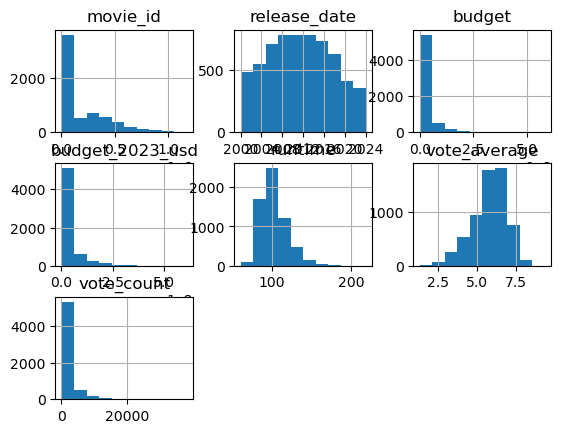

In [8]:
df_movies.hist()

Mention normal distribution of vote_average
Mention that most movies have a low budget, and most movies have a low vote_count

In [9]:
# # Convert budget to 2023 USD
# df_movies['budget_2023_usd'] = df_movies.apply(
#     lambda row: convert_usd(
#         original_amount=row['budget'],
#         original_year=row['release_date'].year,
#         new_year=2023,
#         cpi_by_year=cpi_by_year
#     ),
#     axis=1
# )
# df_movies.sort_values(by="budget_2023_usd", ascending=False)

In [10]:
# Define a function for rating_category
def get_rating_category(vote_average):
    if vote_average >= 7:
        return "good";
    if vote_average >= 5:
        return "ok";
    else:
        return "bad";
    
# # Define a function for rating_category
# def get_rating_category(vote_average):
#     if vote_average >= 6:
#         return "good";
#     else:
#         return "bad";

# Apply the function to df_movies 
df_movies['rating_category'] = df_movies['vote_average'].apply(get_rating_category)
df_movies.sort_values(by="vote_average", ascending=False)

,movie_id,original_title,release_date,budget,budget_2023_usd,runtime,vote_average,vote_count,director_person_ids,genre_ids,rating_category
8077,246895,Complacent,2012-05-01,500000,663566,104,9.400,14,[88039],[18],good
12013,631303,The Devil's Hour,2016-02-02,115000,145998,119,8.900,14,[2411023],"[27, 18, 53]",good
5034,155,The Dark Knight,2008-07-16,185000000,261816713,152,8.523,34473,[525],"[18, 28, 80, 53]",good
15301,554386,Evanescence: Synthesis Live,2018-10-12,100000,121343,88,8.500,68,[1108767],[10402],good
10686,157336,Interstellar,2014-11-05,165000000,212370429,169,8.500,37950,[525],"[12, 18, 878]",good
...,...,...,...,...,...,...,...,...,...,...,...
10715,295884,Saving Christmas,2014-11-14,500000,643547,79,1.800,96,[99388],"[35, 14]",bad
7032,118332,Total Retribution,2011-02-02,1500000,2031893,84,1.800,13,[98360],"[27, 878, 53]",bad
182,203023,Witchcraft XI: Sisters in Blood,2000-05-09,40,71,90,1.700,11,[98712],[27],bad
17869,810511,2025: The World Enslaved by a Virus,2021-01-15,10000,11245,91,1.671,35,"[3025333, 3025334]","[12, 878, 53, 14]",bad


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
os.environ["PATH"] += r";C:\Program Files\Graphviz\bin"
import graphviz

# Initialize binarizer
mlb = MultiLabelBinarizer()

# Multi-hot encode genre_ids
genre_encoded = mlb.fit_transform(df_movies['genre_ids'])
# Create a DataFrame for the multi-hot columns
genre_df = pd.DataFrame(genre_encoded, columns=[f"genre_{g}" for g in mlb.classes_],index=df_movies.index)
print(len(genre_df))

# Combine with your original features
df_movies = pd.concat([df_movies, genre_df], axis=1)
len(df_movies)



6200


6200

In [12]:
# Encode target variable
le_rating = LabelEncoder()
df_movies['rating_encoded'] = le_rating.fit_transform(df_movies['rating_category'])


# Independent variables (X) and dependent variable (y)
X = df_movies[['budget_2023_usd', 'runtime'] + list(genre_df.columns)]
y = df_movies['rating_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

# Train model
model = DecisionTreeClassifier(max_depth=4)
# model = RandomForestClassifier(class_weight='balanced')
# model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le_rating.classes_))

              precision    recall  f1-score   support

         bad       0.69      0.48      0.57       331
        good       0.53      0.20      0.29       207
          ok       0.73      0.89      0.80      1012

    accuracy                           0.71      1550
   macro avg       0.65      0.53      0.55      1550
weighted avg       0.69      0.71      0.69      1550



In [13]:
# draw tree from the trained data by graphviz package
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=['budget_2023_usd', 'runtime']+ list(genre_df.columns),
                                class_names=le_rating.classes_,  
                                filled=True,
                                rounded=True) 

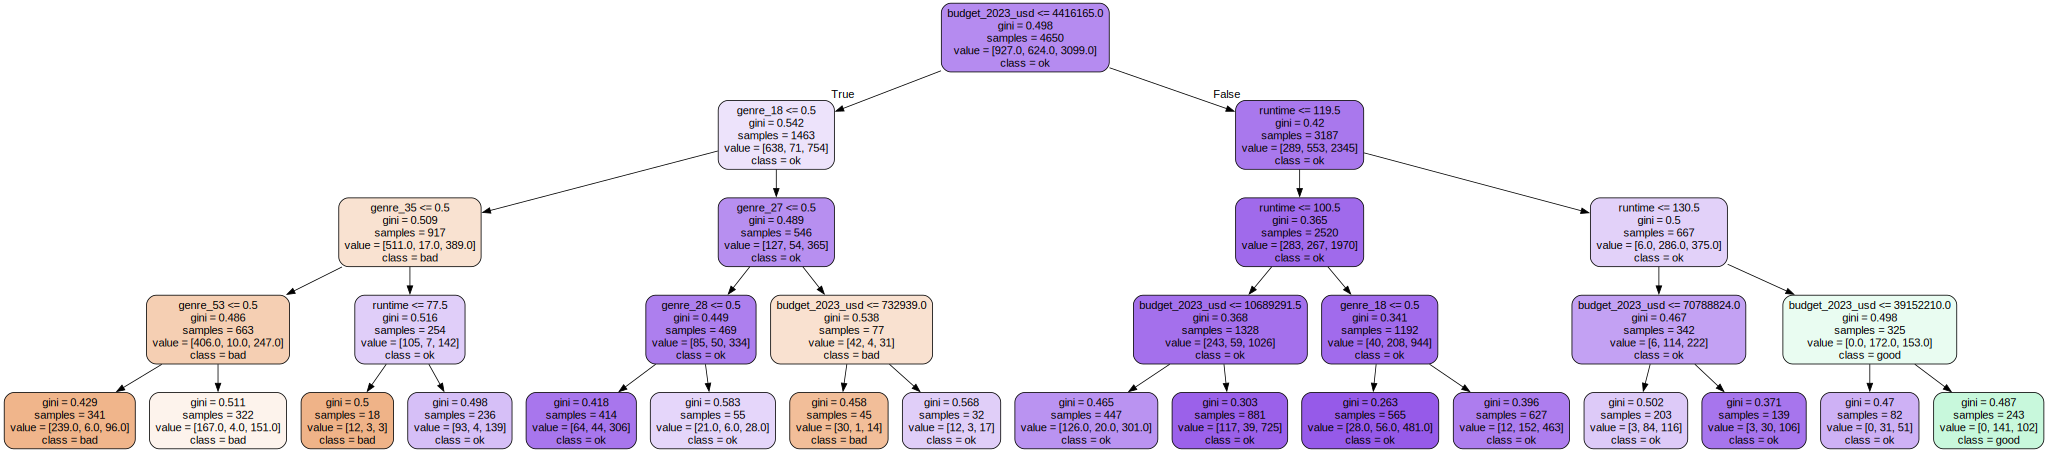

In [14]:
graph = graphviz.Source(dot_data)
graph

Model validation

In [15]:
# # Set the metrics
# scoring = 'accuracy'

In [16]:
# Predict the ratings of the test data
y_testp = model.predict(X_test)
y_testp

array([2, 2, 2, ..., 0, 2, 2])

In [17]:
y_test

18871    1
8077     1
3809     2
7944     2
12873    2
        ..
3776     2
6965     2
10372    2
19714    1
15343    2
Name: rating_encoded, Length: 1550, dtype: int64

In [18]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.7135483870967742


In [19]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[160,   0, 171],
       [  3,  42, 162],
       [ 70,  38, 904]])

In [20]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0,1,2
rating_encoded,,,
0,160,0,171
1,3,42,162
2,70,38,904
